# Experiment 1
## Test if marginal distribution works well

In [1]:
%load_ext autoreload
%autoreload 1
%aimport my_classes.NeuralCopula

import numpy as np
from scipy.stats import norm, multivariate_normal, multivariate_t, t
import torch
from statsmodels.graphics.gofplots import qqplot
from my_classes.NeuralCopula import MarginalModel, CopulaModel, NeuralCopula
from matplotlib import pyplot as plt
from scipy.stats import norm, t, uniform, expon, laplace, lognorm



In [2]:
## Creating data
np.random.seed(0)
torch.manual_seed(0)
## Generate sample
Z = t(df=5, loc=0, scale=1).rvs(size=10000)
scaling = 3.0
boundaryPoints = scaling * np.array([np.max(Z), np.min(Z)])

Z = np.concatenate((Z, boundaryPoints))
Z_squashed = (Z - np.min(Z)) / (np.max(Z) - np.min(Z))

X = torch.tensor(Z_squashed, dtype=torch.float32).view(-1, 1)

# Initialize and train the model with custom layers and neurons
model = MarginalModel(num_layers=6, num_neurons=10, lr=0.01)
model.train_model(X, epochs=5000, log_interval=500)

Training model
Epoch 0, Loss: 13.145569801330566, Constraint losses: L1: 11.145283699035645, L2: 0.0001217599055962637, L3: 1.0000817775726318, L4: 1.0000817775726318
Epoch 500, Loss: -2.6598918437957764, Constraint losses: L1: -2.698620319366455, L2: 0.0, L3: 0.019413292407989502, L4: 0.019315320998430252
Epoch 1000, Loss: -2.6908748149871826, Constraint losses: L1: -2.7044739723205566, L2: 0.0, L3: 0.0068492889404296875, L4: 0.0067499359138309956
Epoch 1500, Loss: -2.7187745571136475, Constraint losses: L1: -2.7255170345306396, L2: 0.0, L3: 0.0034210681915283203, L4: 0.003321379888802767
Epoch 2000, Loss: -2.7244460582733154, Constraint losses: L1: -2.7284200191497803, L2: 0.0, L3: 0.0020368099212646484, L4: 0.0019371302332729101
Epoch 2500, Loss: -2.708970785140991, Constraint losses: L1: -2.711550235748291, L2: 0.0, L3: 0.0013396739959716797, L4: 0.001239823643118143
Epoch 3000, Loss: -2.7292985916137695, Constraint losses: L1: -2.731110095977783, L2: 0.0, L3: 0.0009556412696838379

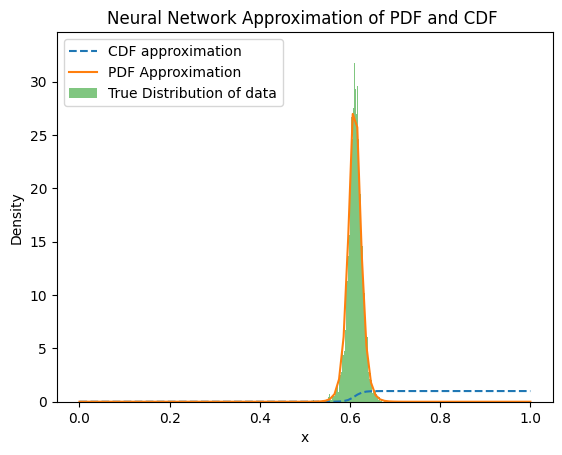

In [25]:
model.PlotModel()

Training model for Gaussian distribution
Training model
Epoch 0, Loss: 20.42458724975586, Constraint losses: L1: 18.420686721801758, L2: 0.0012999196769669652, L3: 1.0012999773025513, L4: 1.0012998580932617
Epoch 500, Loss: -0.6903172731399536, Constraint losses: L1: -0.6930356621742249, L2: 0.0, L3: 0.0014090538024902344, L4: 0.0013093485031276941
Epoch 1000, Loss: -0.6925186514854431, Constraint losses: L1: -0.6935931444168091, L2: 0.0, L3: 0.0005872249603271484, L4: 0.00048728330875746906
Epoch 1500, Loss: -0.6931924819946289, Constraint losses: L1: -0.6938877105712891, L2: 0.0, L3: 0.00039756298065185547, L4: 0.0002976502582896501
Epoch 2000, Loss: -0.6934363842010498, Constraint losses: L1: -0.6939693093299866, L2: 0.0, L3: 0.00031638145446777344, L4: 0.00021655249292962253
Epoch 2500, Loss: -0.6935765743255615, Constraint losses: L1: -0.6940218210220337, L2: 0.0, L3: 0.00027257204055786133, L4: 0.000172686530277133
Epoch 3000, Loss: -0.6936627626419067, Constraint losses: L1: -0.

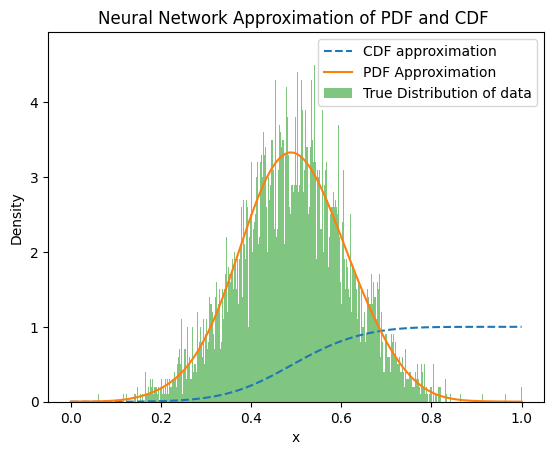

In [6]:
## Create dictionary with datasets from different distributions


datasets = {
    'Gaussian': np.random.normal(size=10000),
    # 'Student-t': np.random.standard_t(df=5, size=10000),
    # 'Uniform': np.random.uniform(size=10000),
    # 'Exponential': np.random.exponential(size=10000),
    # 'Laplace': np.random.laplace(size=10000),
    # 'LogNormal': np.random.lognormal(size=10000),
}

# Distributions and their parameters
distributions = {
    'Gaussian': (norm, {'loc': 0, 'scale': 1}),
    # 'Student-t': (t, {'df': 5}),
    # 'Uniform': (uniform, {'loc': 0, 'scale': 1}),
    # 'Exponential': (expon, {'scale': 1}),
    # 'Laplace': (laplace, {'loc': 0, 'scale': 1}),
    # 'LogNormal': (lognorm, {'mean': 0.0, 'sigma': 1.0}),
}


scaling = 1.0

modelDict = {}
for name, data in datasets.items():
    #Normalize the data
    print(f"Training model for {name} distribution")
    model = MarginalModel(num_layers=6, num_neurons=10, lr=0.01)
    data_tensor = model.CreateNormalizedTensor(data, scaling=scaling)
    # Train the model on the dataset
    model.train_model(data_tensor, epochs=5000, log_interval=500)
    model.PlotModel()
    
    # xPlot = np.linspace(np.min(data), np.max(data), 1000)
    # xPlotTensor = model.CreateNormalizedTensor(xPlot, scaling=scaling)[:-2,:]  # Exclude the last two points
    # CDF_plot = model.evaluateCDFData(xPlotTensor)
    # PDF_plot = model.evaluatePDFData(xPlotTensor)

    # dist = distributions[name][0]
    # params = distributions[name][1]
    # dist_obj = dist(**params)
    # trueCDF = dist_obj.cdf(xPlot)
    # truePDF = dist_obj.pdf(xPlot)

    # plt.hist(data, bins=50, density=True, alpha=0.5, label=f"Histogram of {name} data")
    # plt.plot(xPlot, PDF_plot, label=f"Estimated PDF")
    # plt.plot(xPlot, CDF_plot, label=f"Estimated CDF")
    # plt.plot(xPlot, truePDF, label=f"True PDF", linestyle='--')
    # plt.plot(xPlot, trueCDF, label=f"True CDF", linestyle='--')  
    # plt.title(f"PDF and CDF of {name} data")
    # plt.xlabel("Value")
    # plt.ylabel("Density")
    
    modelDict[name] = model




Validating neural copula against true model for Gaussian distribution


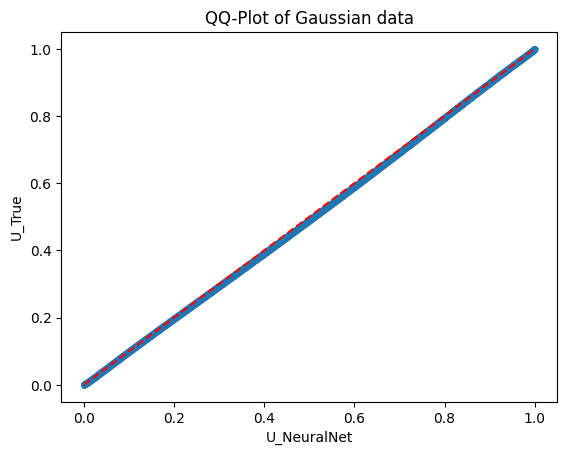

Mean Squared Error for Gaussian distribution: 0.0057
Mean Error for Gaussian distribution: 0.0057
4
------------------------------------------------------------


In [27]:
for name, data in datasets.items(): 
    print(f"Validating neural copula against true model for {name} distribution")
    ## Data as tensor
    #data_tensor = torch.tensor(data, dtype=torch.float32).view(-1, 1)
    data_tensor = model.CreateNormalizedTensor(data, scaling=scaling)[:-2,:]  # Exclude the last two points
    U_NeuralNet = modelDict[name].evaluateCDFData(data_tensor)

    dist = distributions[name][0]
    params = distributions[name][1]
    dist_obj = dist(**params)
    U_True = dist_obj.cdf(data)

    plt.scatter(U_NeuralNet, U_True, alpha=0.5, label=f"{name} data", s=12)
    plt.xlabel("U_NeuralNet")
    plt.ylabel("U_True")
    plt.title(f"QQ-Plot of {name} data")
    plt.plot([0, 1], [0, 1], 'r--', label='y=x')
    plt.show()

    U_NeuralNet = U_NeuralNet.flatten()
    mse = np.mean(np.abs(U_NeuralNet - U_True))
    print(f"Mean Squared Error for {name} distribution: {mse:.4f}")
    meanError = np.mean(U_NeuralNet - U_True)
    print(f"Mean Error for {name} distribution: {meanError:.4f}")
    print(np.count_nonzero(U_NeuralNet < U_True))
    print('------------------------------------------------------------')
    